# Lesson 46: Plotting with Matplotlib and Seaborn

<hr>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import seaborn.objects as so

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline
%config InlineBackend.figure_format = 'svg'

<hr>

In this lesson, we will learn how to use Matplotlib and Seaborn by making many of the same plots as in our [intro lesson on Bokeh](l18_plotting.ipynb) and on [high-level plotting](l19_high_level_plotting.ipynb). To start with, we will use the Glasgow face matching data.

In [2]:
df_gfmt = pd.read_csv('data/gfmt_sleep.csv', na_values='*')
df_gfmt['insomnia'] = df_gfmt['sci'] <= 16

## A Matplotlib scatter plot

A graphic composed with Matplotlib consists of a **figure** (the graphic itself) and one or more **axes**, each an individual plot. Figures and axes are easily created using the `matplotlib.pyplot.subplots()` function, which returns a `Figure` object and a collection (or a single) `Axes` objects. The `matplotlib.pyplot` submodule is traditionally imported as `plt`, as we have done in this notebook. To get a single plot with axes that are 4 inches by 4 inches, we use

    fig, ax = plt.subplots(figsize=(4, 4))
    
The `ax` object, then, has many methods. Most importantly, the `ax.plot()` method allows for making line and scatter plots. To make a scatter plot, we use the `marker='.'` and `linestyle=''` kwargs. The plot below is an example, with the various methods of the `ax` object being self-explanatory.

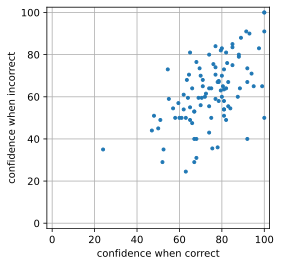

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlabel("confidence when correct")
ax.set_ylabel("confidence when incorrect")
ax.set_xlim(-2.5, 102.5)
ax.set_ylim(-2.5, 102.5)
ax.grid(True)

ax.plot(
    "confidence when correct",
    "confidence when incorrect",
    data=df_gfmt,
    marker=".",
    linestyle="",
)

plt.show(fig)

The above plot has the standard Matplotlib formatting, with the grid being explicitly added (it is not be default) using the `ax.grid()` method.

We could have alternatively make the plot with Numpy arrays instead of the data frame as a data source. In that case, our call to `ax.plot()` is

    ax.plot(
        df_gfmt.loc[:, "confidence when correct"].values,
        df_gfmt.loc[:, "confidence when incorrect"].values,
        marker=".",
        linestyle="",
    )
    
If we want to make a plot with various markers and a legend, we build the plot glyph-by-glyph, as with Bokeh. The `label` kwarg of `ax.plot()` specifies the corresponding text in a legend.

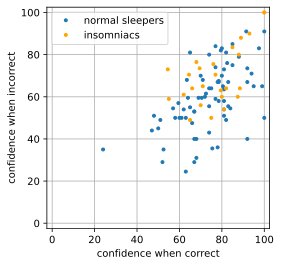

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlabel("confidence when correct")
ax.set_ylabel("confidence when incorrect")
ax.set_xlim(-2.5, 102.5)
ax.set_ylim(-2.5, 102.5)
ax.grid(True)

ax.plot(
    "confidence when correct",
    "confidence when incorrect",
    data=df_gfmt.loc[~df_gfmt["insomnia"], :],
    marker=".",
    linestyle="",
    label="normal sleepers",
)

ax.plot(
    "confidence when correct",
    "confidence when incorrect",
    data=df_gfmt.loc[df_gfmt["insomnia"], :],
    marker=".",
    linestyle="",
    color="orange",
    label="insomniacs",
)

ax.legend()

plt.show(fig)

### Aside: Making a scatter plot with Seaborn

We will take a look at using Seaborn for plotting later in this lesson for making the kinds of plots we have made thus far with iqplot. For now, we demonstrate how to make a scatter plot as above using Seaborn's nifty new (as of June 2023) [objects interface](https://seaborn.pydata.org/tutorial/objects_interface.html). The grammar is similar to Vega-Altair. We have imported `seaborn.objects` as `so`.

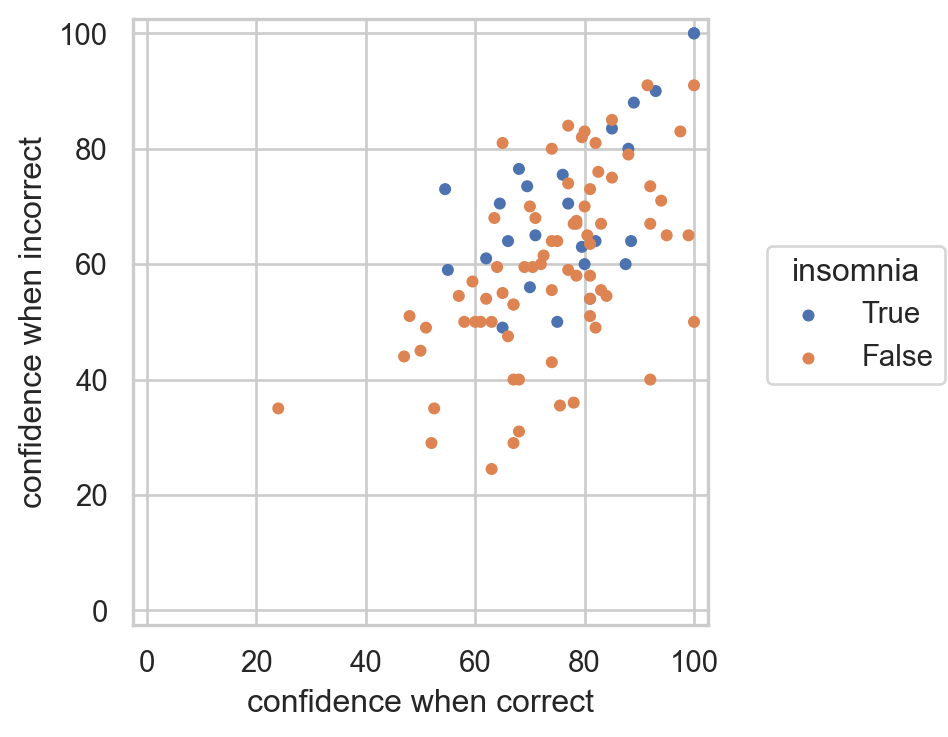

In [5]:
so.Plot(
    df_gfmt, 
    x='confidence when correct', 
    y='confidence when incorrect',
    color='insomnia',
).add(
    so.Dot(pointsize=4),
).limit(
    x=(-2.5, 102.5),
    y=(-2.5, 102.5),
).layout(
    size=(4, 4)
).theme(
    sns.axes_style("whitegrid"),
)

## A Matplotlib line plot

We can similarly make a line plot, as we did in [lesson 22](l22_plotting_time_series_generated_data.ipynb). 

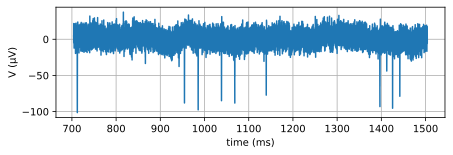

In [6]:
df_spikes = pd.read_csv("data/retina_spikes.csv", comment="#")

fig, ax = plt.subplots(figsize=(7, 2))
ax.set_xlabel("time (ms)")
ax.set_ylabel("V (µV)")
ax.grid(True)

ax.plot(
    "t (ms)",
    "V (uV)",
    data=df_spikes,
    marker="",
    linestyle="-",
)

plt.show(fig)

## Plotting with Seaborn

[Seaborn](https://seaborn.pydata.org/) is a high-level statistical plotting package built on Matplotlib. It is traditionally imported as `sns`, as we have done here. It is best understood by example. We will start by using it to make the same plot of confidence when incorrect versus confidence when correct as we did above (with minor styling differences).

The `with` block in the code cell below specifies one of [Seaborn's pre-defined styles](https://seaborn.pydata.org/tutorial/aesthetics.html). Note the convenience of using the `hue` kwarg in the call to `sns.scatterplot()`. It automatically colors the points according to the `'insomnia'` column and creates a legend. (Again, it is important that the data frame is tidy!)

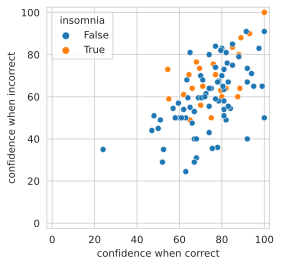

In [7]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(4, 4))
    
    ax = sns.scatterplot(
        df_gfmt,
        x="confidence when correct",
        y="confidence when incorrect",
        hue="insomnia",
    )
    
    ax.set_xlim(-2.5, 102.5)
    ax.set_ylim(-2.5, 102.5)

plt.show(ax)

In the plot above, I explicitly instantiated the figure and axes objects so that I could control the size. Seaborn will otherwise do that automatically.

For the remainder of our plots with Seaborn, we will use the frog tongue strike data set.

In [8]:
df = pd.read_csv("data/frog_tongue_adhesion.csv", comment="#")

We start with a box plot.

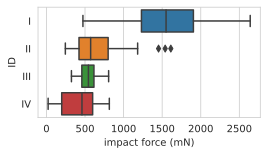

In [9]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(4, 2))

    sns.boxplot(
        df,
        x="impact force (mN)",
        y="ID",
        ax=ax,
    )
    
plt.show(fig)

To overlay a strip plot, we populate the same axes object using `sns.stripplot()`. We style the box plot so the glyphs do not clash with the strip plot. The `showfliers` kwarg suppresses plotting outliers in the box plot, since those will appear in the strip plot anyway.

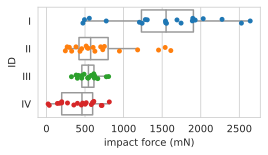

In [10]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(4, 2))

    sns.boxplot(
        df,
        x="impact force (mN)",
        y="ID",
        ax=ax,
        color="white",
        showfliers=False,
        showcaps=False,
    )
    
    sns.stripplot(
        df, x="impact force (mN)", y="ID", ax=ax, hue="ID", jitter=True, legend=False
    )
    
plt.show(fig)

Next, we will make a histogram overlayed with a rug plot, which we need to do explicitly with a call to `sns.rugplot()`.

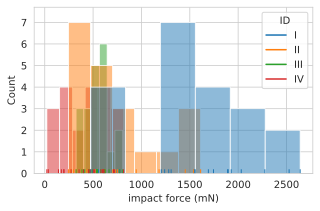

In [11]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(5, 3))
    
    sns.histplot(df, x='impact force (mN)', hue='ID', common_bins=False, ax=ax)
    sns.rugplot(df, x='impact force (mN)', hue='ID', ax=ax)

plt.show(fig)

Finally, we can make an ECDF plot.

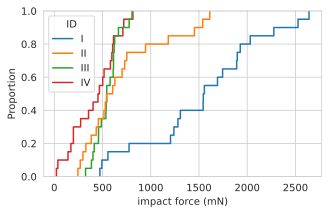

In [12]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(5, 3))
    
    sns.ecdfplot(df, x='impact force (mN)', hue='ID')
    
plt.show(fig)

## There's a lot more!

This is just scratching the surface of what Matplotlib and Seaborn can do. To learn more, you might want to start with their galleries ([Matplotlib](https://matplotlib.org/stable/gallery/index.html), [Seaborn](https://seaborn.pydata.org/examples/index.html)).

## Computing environment

In [13]:
%load_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,jupyterlab

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.12.0

pandas    : 1.5.3
matplotlib: 3.7.1
seaborn   : 0.12.2
jupyterlab: 3.6.3

